In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# linear Regression

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

data = diabetes.data
target = diabetes.target
data.shape, target.shape

((442, 10), (442,))

In [2]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train,x_valid , y_train, y_valid = train_test_split(data,target,random_state=SEED)
x_train.shape, x_valid.shape , y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_valid)

# R2(결정계수)

In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, pred) #
r2

0.4849058889476754

# MSE

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid,pred)
mse

2848.3106508475066

### RMSE

In [9]:
import numpy as np
np.sqrt(mse)

53.36956671032197

### MAE(mean_absolute_error

In [10]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid,pred)
mae

41.54850685988061

### MAPE(mean_absolute_percentage_error)

In [12]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid,pred)

0.37310970433744695

### SMAPE

In [13]:
def smape(true, pred):
    error = np.abs(true-pred) / (np.abs(true) + np.abs(pred))
    return np.mean(error)
smape(y_valid,pred)

0.15271405979135066

# 분류 모형 성능평가

### 혼동행렬

In [14]:
from sklearn.datasets import load_digits #혼동 행렬

digits = load_digits()

In [15]:
data = digits.data
digit = data[0]

#binary classifier
target = (digits.target == 5).astype(int)

In [23]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_valid, y_train, y_valid = train_test_split(data,target,random_state=SEED)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

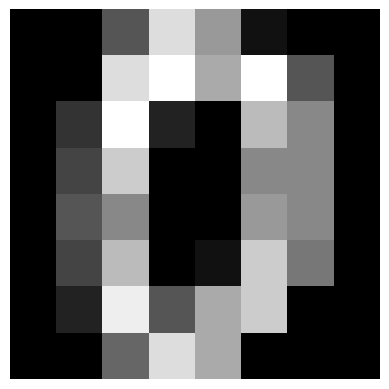

In [16]:
import matplotlib as mpl

digit_img = digit.reshape(8, 8)

plt.imshow(digit_img, cmap="gray")
plt.axis("off")
plt.show()

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

sgd_clf.predict([digit])

array([0])

In [26]:
from sklearn.model_selection import cross_val_predict # 교차검증

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=5)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred) # tp, tn, fp, fn(true positive, true negative, false positive, false negative)

array([[1217,    7],
       [   8,  115]], dtype=int64)

In [28]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
pred_dummy = dummy.predict(x_valid)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

pred_clf = sgd_clf.predict(x_valid)

### Accuracy(정확도)

In [31]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = accuracy_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.8688888888888889
model: 0.9866666666666667


### Precision(정밀도)

In [32]:
from sklearn.metrics import precision_score
score = precision_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = precision_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 1.0


C:\Users\Playdata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sensitivity(민감도) = Recall(재현도) = TPR

In [34]:
from sklearn.metrics import recall_score
score = recall_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = recall_score(y_valid, pred_clf)
print(f"dummy: {score}")

dummy: 0.0
dummy: 0.8983050847457628


### F1 Score

In [36]:
from sklearn.metrics import f1_score
score = f1_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = f1_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 0.9464285714285715


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, pred_dummy))
print('-'*100)
print(classification_report(y_valid, pred_clf))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       391
           1       0.00      0.00      0.00        59

    accuracy                           0.87       450
   macro avg       0.43      0.50      0.46       450
weighted avg       0.75      0.87      0.81       450

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       391
           1       1.00      0.90      0.95        59

    accuracy                           0.99       450
   macro avg       0.99      0.95      0.97       450
weighted avg       0.99      0.99      0.99       450



C:\Users\Playdata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

### Precision-Recall Trade-off

#### 임계값

In [38]:
pred_proba = sgd_clf.decision_function(x_valid)

In [40]:
threshold = 0
pred=np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid,pred), recall_score(y_valid, pred)

(1.0, 0.8983050847457628)

In [41]:
threshold = 30000
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid,pred), recall_score(y_valid,pred)

C:\Users\Playdata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [42]:
threshold = -30000
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid,pred), recall_score(y_valid,pred)

(0.13111111111111112, 1.0)

### DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree.fit(x_train, y_train)
pred_tree = tree.predict(x_valid)

In [44]:
pred_proba = tree.predict_proba(x_valid)[:,1]

In [45]:
threshold = 0.5 #사이킷런의 디폴트값
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid, pred) , recall_score(y_valid, pred)

(0.9811320754716981, 0.8813559322033898)

In [46]:
threshold = 0.9
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid, pred) , recall_score(y_valid, pred)

(0.9811320754716981, 0.8813559322033898)

In [47]:
threshold = 0.1
pred = np.where(pred_proba > threshold, 1, 0)

precision_score(y_valid, pred) , recall_score(y_valid, pred)

(0.8813559322033898, 0.8813559322033898)

### 1종 오류, 2종 오류

### 귀무가설

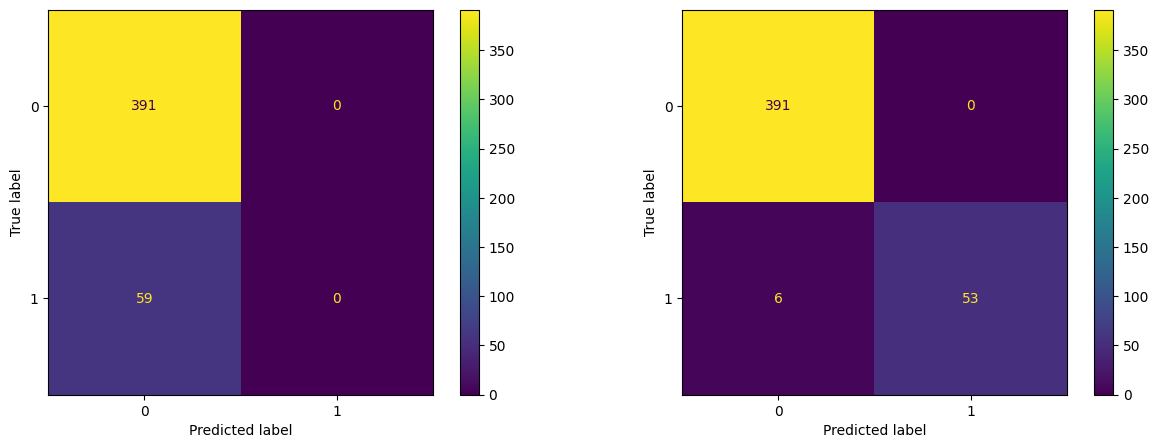

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

cm = confusion_matrix(y_valid, pred_dummy) # dummy값 : 첫번째 줄
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

cm = confusion_matrix(y_valid, pred_clf) # 실제 값 : 두번째 줄
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[1])
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_valid, pred_clf)

array([[391,   0],
       [  6,  53]], dtype=int64)

### ROC curve

In [53]:
pred_dummy = dummy.predict_proba(x_valid)[:,1]
pred_tree = tree.predict_proba(x_valid)[:,1]

In [54]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_valid, pred_dummy, ax=ax)
RocCurveDisplay.from_predictions(y_valid, pred_tree, ax=ax)
plt.show()

### AUROC

In [55]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid, pred_dummy)
print(f'dummy: {auc(fpr, tpr)}')
print('-'*50)
fpr, tpr, thresholds = roc_curve(y_valid, pred_tree)
print(f'model: {auc(fpr, tpr)}')

dummy: 0.5
--------------------------------------------------
model: 0.9479604664268065


# Multi Classification

### 소프트맥스 함수

1.0


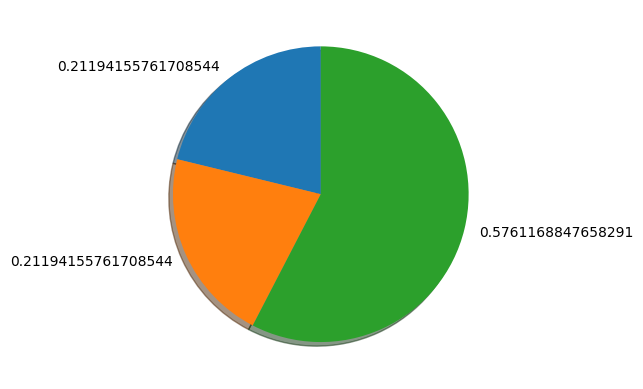

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

x = np.array([1.0, 1.0, 2.0])

y = softmax(x)

print(np.sum(y))

ratio = y
labels = y

plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

소프트맥스 출력합: 1.0


ValueError: 'label' must be of length 'x'

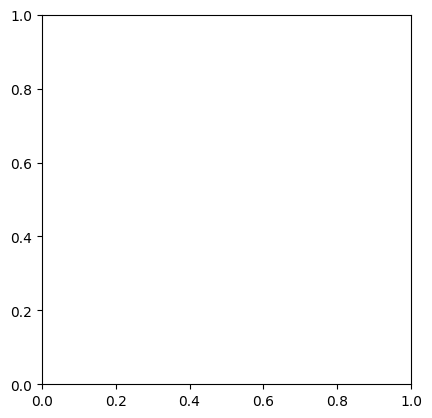

In [57]:
x = tree.predict_proba(x_valid)[0]
 
y = softmax(x)
 
print(f'소프트맥스 출력합: {np.sum(y)}')
 
ratio = y
labels = [0,1,2,3,4,5,6,7,8,9]
 
plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

In [58]:
f1_score(y_valid, pred, average="micro")

0.9688888888888889

In [59]:
f1_score(y_valid, pred, average="macro")

0.9317265594520785

In [60]:
f1_score(y_valid, pred, average="weighted")

0.9688888888888889

# logloss

In [61]:
from sklearn.metrics import log_loss

pred = tree.predict_proba(x_valid)
log_loss(y_valid,pred)

0.16692306172385546